In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


# Validation, regularisation and callbacks

 ## Coding tutorials
 #### [1. Validation sets](#coding_tutorial_1)
 #### [2. Model regularisation](#coding_tutorial_2)
 #### [3. Introduction to callbacks](#coding_tutorial_3)
 #### [4. Early stopping / patience](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Validation sets

#### Load the data

In [2]:
# Load the diabetes dataset
from sklearn.datasets import load_diabetes
diabetes_dataset = load_diabetes()

In [3]:
# Save the input and target variables
data = diabetes_dataset.data
targets = diabetes_dataset.target

In [4]:
# Normalise the target data (this will make clearer training curves)
targets = (targets - targets.mean()) / targets.std()
print(targets.shape)

(442,)


In [5]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
train_data, test_data, train_targets, test_targets = train_test_split(data, targets,test_size =0.1)


# Show data properties

(397, 10)
(45, 10)
(397,)
(45,)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0382bd3130>,
      dtype=object)

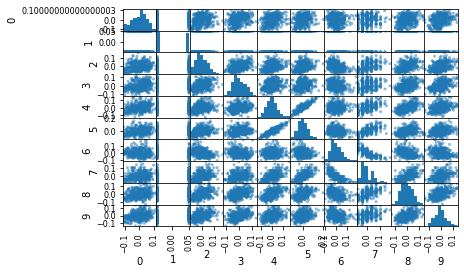

In [6]:
print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_targets.shape)


import pandas as pd
from pandas.plotting import scatter_matrix
scatter_matrix(pd.DataFrame(train_data))

#### Train a feedforward neural network model

In [7]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    model = Sequential([
        Dense(128, activation="relu", input_shape = (train_data.shape[1],)),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(1)
    ])
    return model
model = get_model()

In [8]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [9]:
# Compile the model
model.compile(loss=tf.keras.losses.MeanSquaredError(), metrics=["mse"], optimizer = tf.keras.optimizers.Adam())

In [10]:
# Train the model, with some of the data reserved for validation
history  = model.fit(train_data, train_targets, epochs=100,batch_size = 64, validation_split=0.1, verbose = True)

Epoch 1/100
6/6 [==============================] - 0s 23ms/step - loss: 1.0001 - mse: 1.0001 - val_loss: 0.6708 - val_mse: 0.6708
Epoch 2/100
6/6 [==============================] - 0s 6ms/step - loss: 0.9077 - mse: 0.9077 - val_loss: 0.5725 - val_mse: 0.5725
Epoch 3/100
6/6 [==============================] - 0s 5ms/step - loss: 0.6792 - mse: 0.6792 - val_loss: 0.5475 - val_mse: 0.5475
Epoch 4/100
6/6 [==============================] - 0s 6ms/step - loss: 0.5441 - mse: 0.5441 - val_loss: 0.9313 - val_mse: 0.9313
Epoch 5/100
6/6 [==============================] - 0s 5ms/step - loss: 0.5536 - mse: 0.5536 - val_loss: 0.8288 - val_mse: 0.8288
Epoch 6/100
6/6 [==============================] - 0s 5ms/step - loss: 0.5976 - mse: 0.5976 - val_loss: 0.6341 - val_mse: 0.6341
Epoch 7/100
6/6 [==============================] - 0s 5ms/step - loss: 0.5141 - mse: 0.5141 - val_loss: 0.5841 - val_mse: 0.5841
Epoch 8/100
6/6 [==============================] - 0s 6ms/step - loss: 0.5138 - mse: 0.5138 - va

6/6 [==============================] - 0s 7ms/step - loss: 0.1559 - mse: 0.1559 - val_loss: 0.9047 - val_mse: 0.9047
Epoch 65/100
6/6 [==============================] - 0s 6ms/step - loss: 0.1637 - mse: 0.1637 - val_loss: 0.9467 - val_mse: 0.9467
Epoch 66/100
6/6 [==============================] - 0s 6ms/step - loss: 0.1619 - mse: 0.1619 - val_loss: 0.8870 - val_mse: 0.8870
Epoch 67/100
6/6 [==============================] - 0s 6ms/step - loss: 0.1865 - mse: 0.1865 - val_loss: 0.9488 - val_mse: 0.9488
Epoch 68/100
6/6 [==============================] - 0s 5ms/step - loss: 0.1956 - mse: 0.1956 - val_loss: 0.9051 - val_mse: 0.9051
Epoch 69/100
6/6 [==============================] - 0s 6ms/step - loss: 0.1650 - mse: 0.1650 - val_loss: 0.9585 - val_mse: 0.9585
Epoch 70/100
6/6 [==============================] - 0s 6ms/step - loss: 0.1434 - mse: 0.1434 - val_loss: 0.9480 - val_mse: 0.9480
Epoch 71/100
6/6 [==============================] - 0s 7ms/step - loss: 0.1052 - mse: 0.1052 - val_loss

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


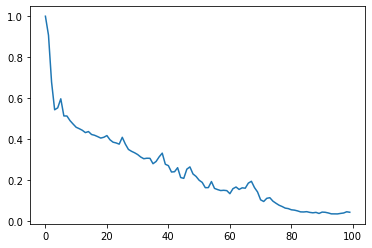

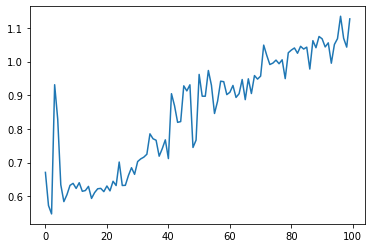

In [11]:
from matplotlib import pyplot as plt
print(history.history.keys())
plt.plot(history.history['loss'])
plt.show()
plt.plot(history.history['val_loss'])
plt.show()

In [12]:
# Evaluate the model on the test set
loss, mae = model.evaluate(test_data, test_targets)
(loss, mae)

2/2 [==============================] - 0s 1ms/step - loss: 0.8479 - mse: 0.8479


(0.8478917479515076, 0.8478917479515076)

#### Plot the learning curves

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

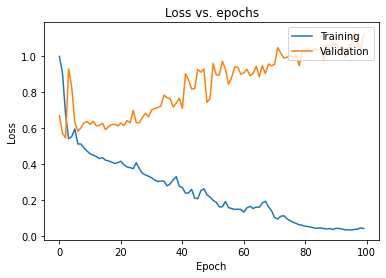

In [14]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_2"></a>
## Model regularisation

#### Adding regularisation with weight decay and dropout

In [15]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [16]:
def get_regularised_model(wd, rate):
    model = Sequential([
        Dense(128, kernel_regularizer = tf.keras.regularizers.l2(wd) , activation="relu", input_shape=(train_data.shape[1],)),
        Dropout(rate),
        Dense(128, kernel_regularizer = tf.keras.regularizers.l2(wd),activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = tf.keras.regularizers.l2(wd),activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = tf.keras.regularizers.l2(wd),activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = tf.keras.regularizers.l2(wd),activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = tf.keras.regularizers.l2(wd),activation="relu"),
        Dense(1)
    ])
    return model


In [17]:
# Re-build the model with weight decay and dropout layers
model = get_regularised_model(1e-4,0.3)

In [18]:
# Compile the model

model.compile(loss=tf.keras.losses.MeanSquaredError(), metrics=["mse"], optimizer = tf.keras.optimizers.Adam())
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               1408      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)              

In [19]:
# Train the model, with some of the data reserved for validation
history = model.fit(train_data, train_targets,epochs=100, batch_size = 100, validation_split=0.1)


Epoch 1/100
4/4 [==============================] - 0s 33ms/step - loss: 1.0813 - mse: 1.0161 - val_loss: 0.7699 - val_mse: 0.7054
Epoch 2/100
4/4 [==============================] - 0s 7ms/step - loss: 1.0674 - mse: 1.0033 - val_loss: 0.7702 - val_mse: 0.7068
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: 1.0490 - mse: 0.9860 - val_loss: 0.7646 - val_mse: 0.7023
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 1.0004 - mse: 0.9383 - val_loss: 0.7334 - val_mse: 0.6719
Epoch 5/100
4/4 [==============================] - 0s 9ms/step - loss: 0.9153 - mse: 0.8540 - val_loss: 0.7032 - val_mse: 0.6423
Epoch 6/100
4/4 [==============================] - 0s 7ms/step - loss: 0.8440 - mse: 0.7832 - val_loss: 0.6968 - val_mse: 0.6364
Epoch 7/100
4/4 [==============================] - 0s 8ms/step - loss: 0.7836 - mse: 0.7234 - val_loss: 0.7018 - val_mse: 0.6419
Epoch 8/100
4/4 [==============================] - 0s 8ms/step - loss: 0.7726 - mse: 0.7129 - va

4/4 [==============================] - 0s 8ms/step - loss: 0.4443 - mse: 0.3972 - val_loss: 0.7824 - val_mse: 0.7354
Epoch 65/100
4/4 [==============================] - 0s 8ms/step - loss: 0.4275 - mse: 0.3805 - val_loss: 0.7960 - val_mse: 0.7490
Epoch 66/100
4/4 [==============================] - 0s 8ms/step - loss: 0.4574 - mse: 0.4105 - val_loss: 0.7654 - val_mse: 0.7186
Epoch 67/100
4/4 [==============================] - 0s 8ms/step - loss: 0.4524 - mse: 0.4056 - val_loss: 0.7316 - val_mse: 0.6849
Epoch 68/100
4/4 [==============================] - 0s 8ms/step - loss: 0.4414 - mse: 0.3948 - val_loss: 0.7105 - val_mse: 0.6639
Epoch 69/100
4/4 [==============================] - 0s 7ms/step - loss: 0.4428 - mse: 0.3962 - val_loss: 0.7799 - val_mse: 0.7334
Epoch 70/100
4/4 [==============================] - 0s 7ms/step - loss: 0.4469 - mse: 0.4005 - val_loss: 0.7889 - val_mse: 0.7425
Epoch 71/100
4/4 [==============================] - 0s 7ms/step - loss: 0.4134 - mse: 0.3670 - val_loss

In [20]:
# Evaluate the model on the test set



#### Plot the learning curves

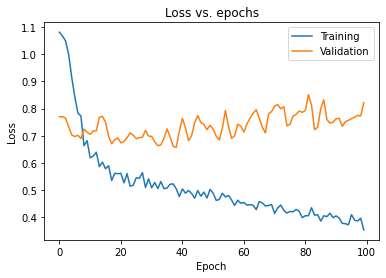

In [21]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_3"></a>
## Introduction to callbacks

#### Example training callback

In [22]:
# Write a custom callback
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import EarlyStopping

class TrainingCallBack(Callback):
    
    def on_train_begin(self,d):
        print("Training begined")
        
    def on_epoch_end(self, epoch, logs = None):
        print("epoch = " + str(epoch))  


In [23]:
# Re-build the model
model = get_regularised_model(wd=1e-4,rate = 0.3)

In [24]:
# Compile the model
model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer = tf.keras.optimizers.Adam())

#### Train the model with the callback

In [25]:
# Train the model, with some of the data reserved for validation
model.fit(train_data, train_targets,callbacks=[TrainingCallBack()], epochs=100, validation_split=0.15, verbose = False)

Training begined
epoch = 0
epoch = 1
epoch = 2
epoch = 3
epoch = 4
epoch = 5
epoch = 6
epoch = 7
epoch = 8
epoch = 9
epoch = 10
epoch = 11
epoch = 12
epoch = 13
epoch = 14
epoch = 15
epoch = 16
epoch = 17
epoch = 18
epoch = 19
epoch = 20
epoch = 21
epoch = 22
epoch = 23
epoch = 24
epoch = 25
epoch = 26
epoch = 27
epoch = 28
epoch = 29
epoch = 30
epoch = 31
epoch = 32
epoch = 33
epoch = 34
epoch = 35
epoch = 36
epoch = 37
epoch = 38
epoch = 39
epoch = 40
epoch = 41
epoch = 42
epoch = 43
epoch = 44
epoch = 45
epoch = 46
epoch = 47
epoch = 48
epoch = 49
epoch = 50
epoch = 51
epoch = 52
epoch = 53
epoch = 54
epoch = 55
epoch = 56
epoch = 57
epoch = 58
epoch = 59
epoch = 60
epoch = 61
epoch = 62
epoch = 63
epoch = 64
epoch = 65
epoch = 66
epoch = 67
epoch = 68
epoch = 69
epoch = 70
epoch = 71
epoch = 72
epoch = 73
epoch = 74
epoch = 75
epoch = 76
epoch = 77
epoch = 78
epoch = 79
epoch = 80
epoch = 81
epoch = 82
epoch = 83
epoch = 84
epoch = 85
epoch = 86
epoch = 87
epoch = 88
epoch = 89
epo

In [26]:
# Evaluate the model
model.evaluate(test_data, test_targets)

2/2 [==============================] - 0s 1ms/step - loss: 0.4608


0.4608415365219116

Text(0.5, 1.0, 'real value vs. model prediction value')

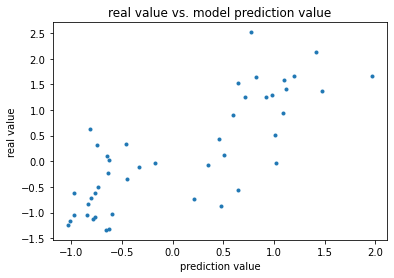

In [27]:
# Make predictions with the model
prediction = model.predict(test_data)
plt.plot(prediction, test_targets,'.')
plt.xlabel("prediction value")
plt.ylabel("real value")
plt.title("real value vs. model prediction value")

***
<a id="coding_tutorial_4"></a>
## Early stopping / patience

#### Re-train the models with early stopping

In [28]:
# Re-train the unregularised model
model = get_model()
model.compile(loss = "mse", metrics = [])
unreg_history = model.fit(train_data, train_targets,epochs = 100, validation_split=0.1, batch_size = 64, verbose = True, callbacks = [tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=2,mode="min")])

Epoch 1/100
6/6 [==============================] - 0s 19ms/step - loss: 0.9728 - val_loss: 0.5978
Epoch 2/100
6/6 [==============================] - 0s 6ms/step - loss: 0.7175 - val_loss: 0.5983
Epoch 3/100
6/6 [==============================] - 0s 5ms/step - loss: 0.5372 - val_loss: 0.6765


In [29]:
# Evaluate the model on the test set
model.evaluate(test_data, test_targets)

2/2 [==============================] - 0s 1ms/step - loss: 0.5420


0.541998028755188

In [30]:
# Re-train the regularised model
model = get_regularised_model(wd = 1e-4, rate = 0.3)
model.compile(loss = "mse", metrics = [])
reg_history = model.fit(train_data, train_targets,epochs = 100, validation_split=0.1, batch_size = 64, verbose = True, callbacks = [tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=2,mode="min")])

Epoch 1/100
6/6 [==============================] - 0s 23ms/step - loss: 1.0599 - val_loss: 0.7270
Epoch 2/100
6/6 [==============================] - 0s 6ms/step - loss: 0.8685 - val_loss: 0.6191
Epoch 3/100
6/6 [==============================] - 0s 6ms/step - loss: 0.6716 - val_loss: 0.6435
Epoch 4/100
6/6 [==============================] - 0s 7ms/step - loss: 0.6011 - val_loss: 0.7340


In [31]:
# Evaluate the model on the test set
model.evaluate(test_data, test_targets)

2/2 [==============================] - 0s 2ms/step - loss: 0.5198


0.5197640657424927

#### Plot the learning curves

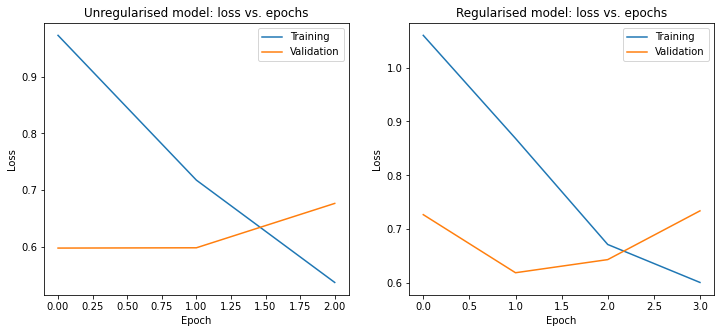

In [32]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()